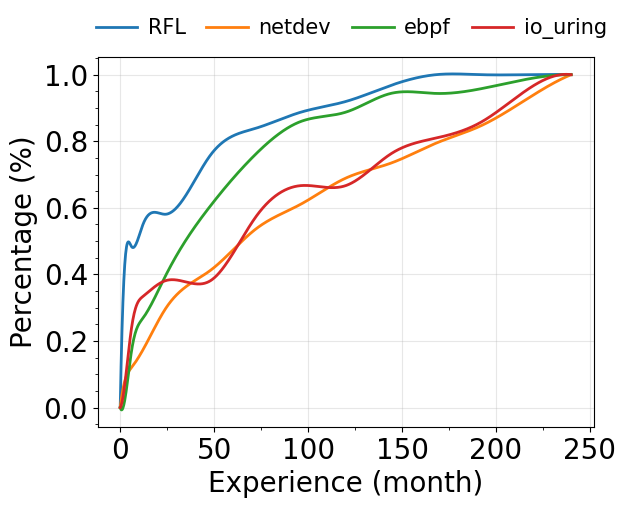

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.pyplot import MultipleLocator

def dup(A,B):
    C = []
    if len(A) != len(B):
        return C
    for i in range(len(A)):
        times = A[i]
        for j in range(times):
            C.append(B[i])
    return C

commit_count = [[29, 1, 4, 2, 11, 5, 3, 2, 3, 2, 0, 0, 0],
[24, 8, 14, 33, 31, 33, 20, 21, 12, 16, 14, 21, 20],
[3, 9, 7, 9, 15, 11, 7, 2, 4, 0, 1, 2, 1],
[2, 3, 2, 1, 0, 4, 2, 0, 2, 1, 1, 2, 1]]
time_line = [0,3,6,12,24,48,72,96,120,144,168,192,216,240]
labels = ["RFL",
"netdev", 
"ebpf",
"io_uring"]
# dup_time_line = []
percent_commit_count = []
for i in range(len(commit_count)):
    cur_commit_count = np.array(commit_count[i])
    cur_commit_count = np.insert(cur_commit_count, 0, 0)
    pcc = cur_commit_count / np.sum(cur_commit_count)
    # print(pcc)
    for j in range(1,len(pcc)):
        pcc[j] += pcc[j - 1]
    percent_commit_count.append(pcc)
    # dup_time_line.append(dup(commit_count[i], time_line[1:]))
# print(percent_commit_count)

fig, ax = plt.subplots()
# for j, time_line in enumerate(dup_time_line):
#     ax.ecdf(time_line, label=labels[j])

for j, cc in enumerate(percent_commit_count):
    model = make_interp_spline(time_line, cc)
    x = np.linspace(0,240,1000)
    y = model(x)
    ax.plot(x, y, label=labels[j], lw=2)
    ax.set_xlabel('Experience (month)', size=20)
    ax.set_ylabel('Percentage (%)', size=20)
    ax.tick_params(labelsize=20)
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(25))
    ax.grid(alpha=0.3)
fig.legend(ncol=4, frameon=False, bbox_to_anchor=(0.95,1), fontsize=15, columnspacing=1, handletextpad=0.5)
plt.savefig('./figure9.pdf', dpi=100, bbox_inches='tight')